In [ ]:
# @title Default title text
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize,  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from tensorflow.keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


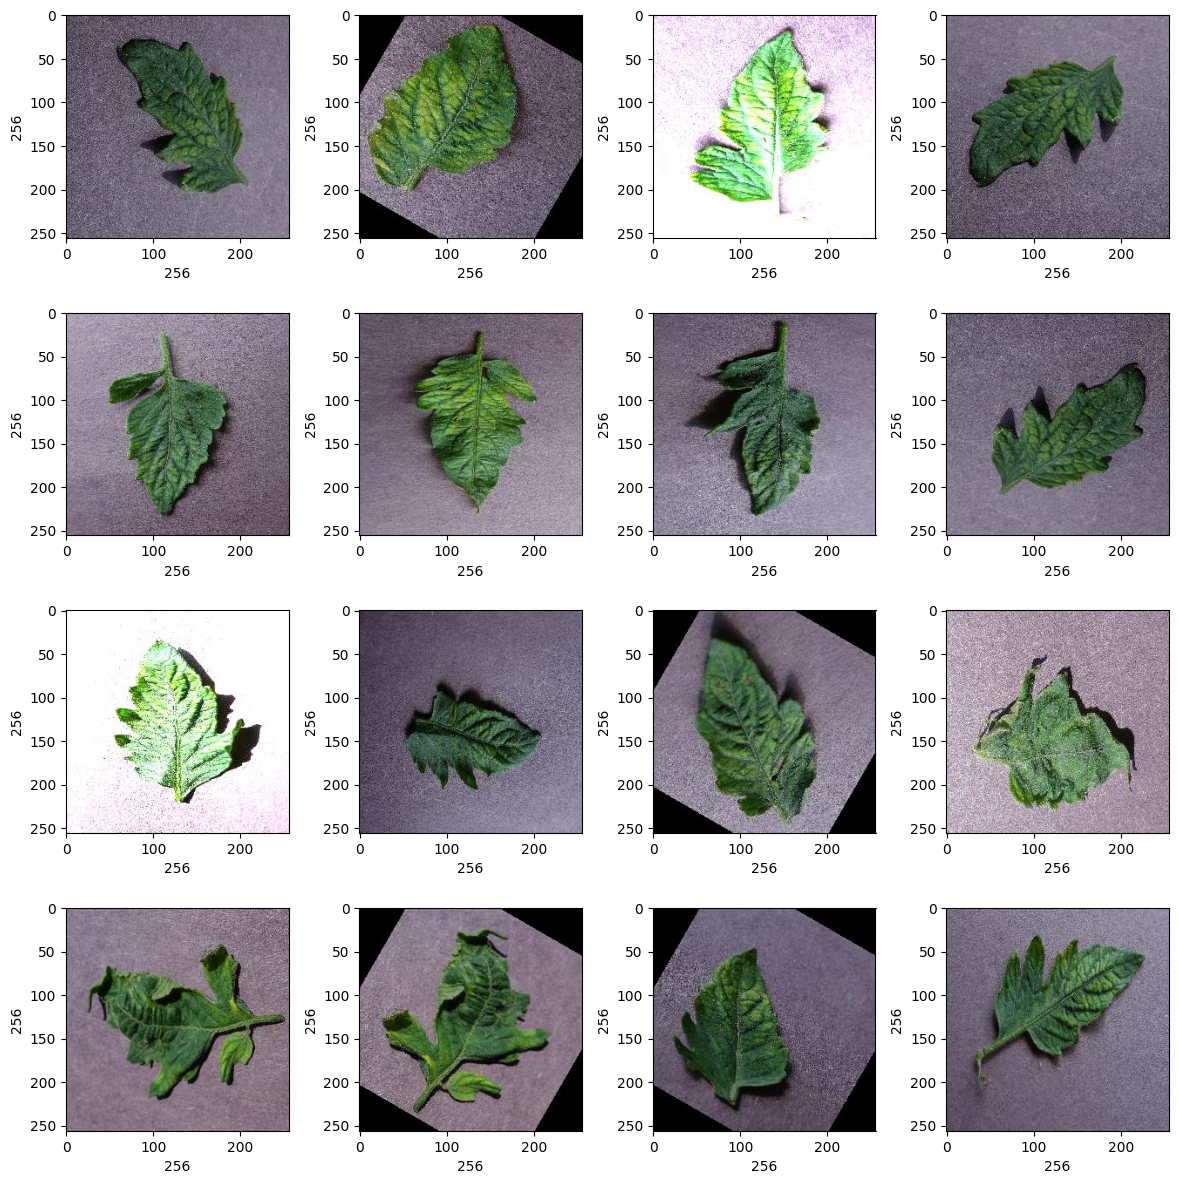

In [ ]:
plt.figure(figsize=(12,12))
path = "/content/drive/MyDrive/Tomato_mosaic_virus"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)

In [ ]:
#Converting Images to array
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

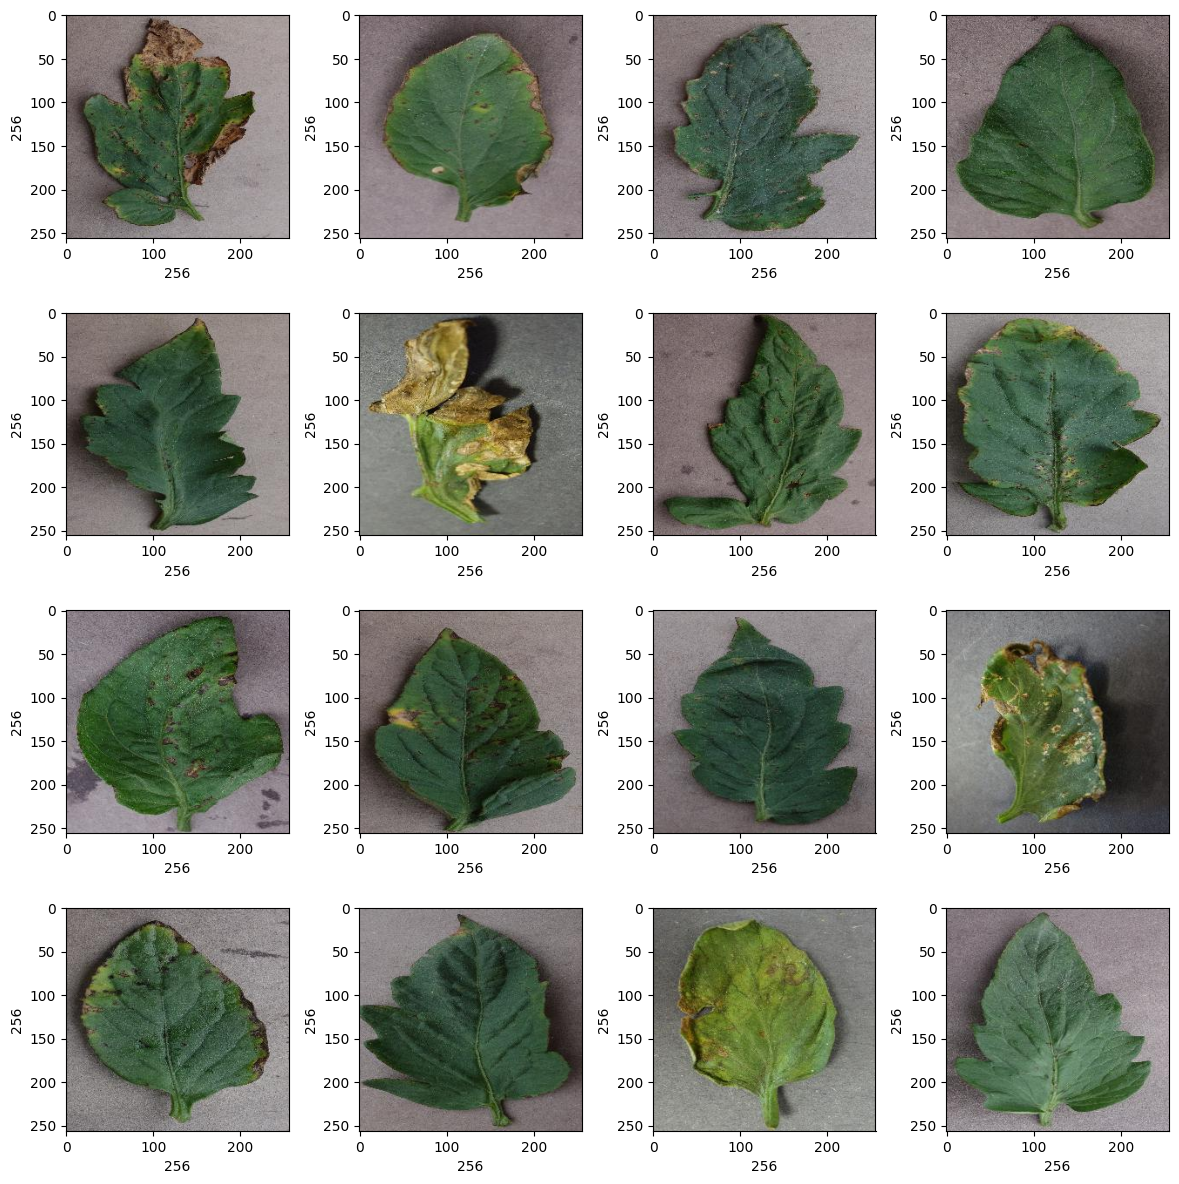

In [ ]:
#Now we will observe some of the iamges that are their in our dataset. We will plot 12 images here using the matplotlib library.
plt.figure(figsize=(12,12))
path = "/content/drive/MyDrive/Plant_images/Tomato___Bacterial_spot"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image



#Converting Images to array
# by using cv2, it converts image dimensions into (220*,200*) pixcels
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None
dir = "/content/drive/MyDrive/Plant_images"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0,1,2]
temp = -1

# Reading and converting image to numpy array
#Now we will convert all the images into numpy array.

for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

In [ ]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

#it is a balanced dataset as you can see

0    300
1    300
2    300
Name: count, dtype: int64

In [ ]:
# observe the shape of the image.
image_list[0].shape

(256, 256, 3)

In [ ]:
#Checking the total number of the images which is the length of the labels list.
label_list = np.array(label_list)
label_list.shape

(900,)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10)

In [ ]:
#Now we will normalize the dataset of our images. As pixel values ranges from 0 to 255 so we will divide each image pixel with 255 to normalize the dataset.
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 256,256,3)
x_test = x_test.reshape( -1, 256,256,3)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 85, 85, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 42, 42, 16)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 28224)             0         
                                                                 
 dense (Dense)               (None, 8)                 2

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

In [ ]:
#Next we will split the dataset into validation and training data.
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [ ]:
# Training the model
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs,
                    validation_data = (x_val, y_val))

Epoch 1/50
5/5 [==============================] - 49s 7s/step - loss: 1.0622 - accuracy: 0.4549 - val_loss: 1.0216 - val_accuracy: 0.6528
Epoch 2/50
5/5 [==============================] - 34s 7s/step - loss: 0.9938 - accuracy: 0.6927 - val_loss: 0.9611 - val_accuracy: 0.6319
Epoch 3/50
5/5 [==============================] - 37s 8s/step - loss: 0.9284 - accuracy: 0.6372 - val_loss: 0.8931 - val_accuracy: 0.7292
Epoch 4/50
5/5 [==============================] - 34s 7s/step - loss: 0.8581 - accuracy: 0.7552 - val_loss: 0.8215 - val_accuracy: 0.8264
Epoch 5/50
5/5 [==============================] - 34s 7s/step - loss: 0.7830 - accuracy: 0.8264 - val_loss: 0.7462 - val_accuracy: 0.8403
Epoch 6/50
5/5 [==============================] - 34s 6s/step - loss: 0.7080 - accuracy: 0.8576 - val_loss: 0.6734 - val_accuracy: 0.8819
Epoch 7/50
5/5 [==============================] - 34s 6s/step - loss: 0.6346 - accuracy: 0.9149 - val_loss: 0.6066 - val_accuracy: 0.8958
Epoch 8/50
5/5 [==================

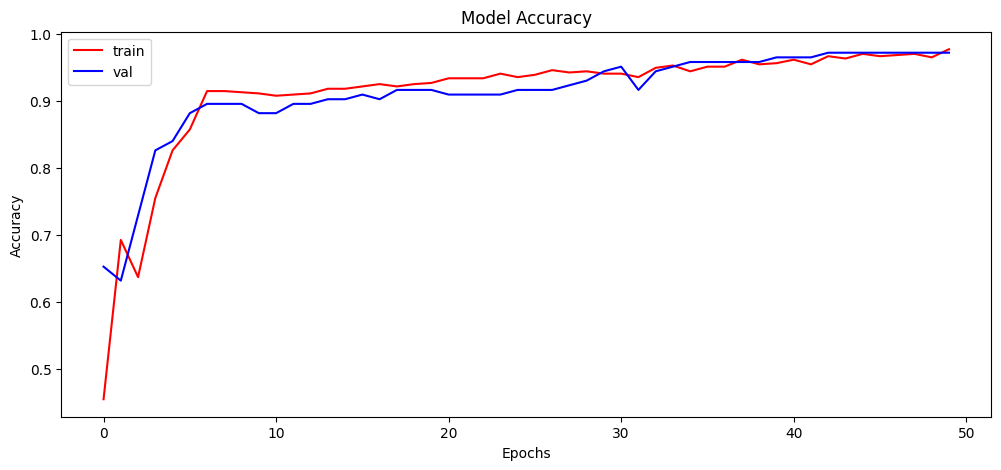

In [ ]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
6/6 [==============================] - 3s 469ms/step - loss: 0.1204 - accuracy: 0.9389
Test Accuracy: 93.88889074325562


In [ ]:
y_pred = model.predict(x_test)

6/6 [==============================] - 11s 2s/step


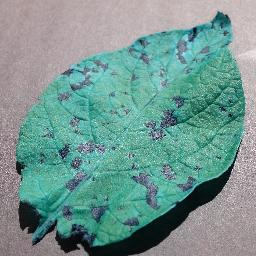

In [ ]:
# Plotting image to compare
img = array_to_img(x_test[10])
img

In [ ]:
# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",all_labels[np.argmax(y_test[10])])
print("Predicted : ",all_labels[np.argmax(y_pred[10])])

Originally :  Potato-Early_blight
Predicted :  Potato-Early_blight


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Plotting 16 images to check dataset
plt.figure(figsize=(12,12))
path = "/content/drive/MyDrive/Tomato_mosaic_virus"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10) # width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10) # height of image

# Function to convert images to array
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image, (256,256))
            return img_to_array(image)
        else:
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

dir = "/content/drive/MyDrive/Plant_images"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0, 1, 2]
label_map = {0: 'Corn-Common_rust', 1: 'Potato-Early_blight', 2: 'Tomato-Bacterial_spot'}
temp = -1

# Reading and converting images to numpy array
for directory in root_dir:
    plant_image_list = listdir(f"{dir}/{directory}")
    temp += 1
    for files in plant_image_list:
        image_path = f"{dir}/{directory}/{files}"
        image_list.append(convert_image_to_array(image_path))
        label_list.append(binary_labels[temp])

# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
print(label_counts.head())

# Checking the total number of the images which is the length of the labels list
label_list = np.array(label_list)
print(label_list.shape)

# Splitting the dataset into training and testing data
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state=10)

# Normalize the dataset
x_train = np.array(x_train, dtype=np.float16) / 255.0
x_test = np.array(x_test, dtype=np.float16) / 255.0
x_train = x_train.reshape(-1, 256, 256, 3)
x_test = x_test.reshape(-1, 256, 256, 3)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Building the model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same", input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics=['accuracy'])

# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

# Training the model
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                    validation_data=(x_val, y_val))

# Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

# Evaluate the model
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

# Predicting the labels of test data
y_pred = model.predict(x_test)
predicted_classes = np.argmax(y_pred, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Map the predicted labels to disease names
predicted_diseases = [label_map[label] for label in predicted_classes]
true_diseases = [label_map[la
[ ]
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize,  LabelBinarizer

[ ]
from google.colab import drive
drive.mount('/content/drive/')
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
[ ]
plt.figure(figsize=(12,12))
path = "/content/drive/MyDrive/Tomato_mosaic_virus"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)

[ ]
#Converting Images to array
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None
[ ]
#In this project we will create a Convolutional Neural Network which will be able to predict whether a plant is suffering from a disease. We will use different layers and other hyperparameters for building, training and testing this classifictaion model.We will be using tensorflow and keras for this project.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize,  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from tensorflow.keras.utils import to_categorical
# Plotting 12 images to check dataset
#Now we will observe some of the iamges that are their in our dataset. We will plot 12 images here using the matplotlib library.
plt.figure(figsize=(12,12))
path = "/content/drive/MyDrive/Plant_images/Tomato___Bacterial_spot"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

#After visualizing the images let us move forward and create a function which will convert the images into a numpy array. It is required because we will normalize our dataset after this.

#Converting Images to array
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None
dir = "/content/drive/MyDrive/Plant_images"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0,1,2]
temp = -1

# Reading and converting image to numpy array
#Now we will convert all the images into numpy array.

for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

[ ]
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

#it is a balanced dataset as you can see
0    300
1    300
2    300
Name: count, dtype: int64
[ ]
#Next we will observe the shape of the image.
image_list[0].shape
(256, 256, 3)
[ ]
#Checking the total number of the images which is the length of the labels list.
label_list = np.array(label_list)
label_list.shape
(900,)
[ ]
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10)
[ ]
#Now we will normalize the dataset of our images. As pixel values ranges from 0 to 255 so we will divide each image pixel with 255 to normalize the dataset.
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 256,256,3)
x_test = x_test.reshape( -1, 256,256,3)
[ ]
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
[ ]
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #
=================================================================
 conv2d (Conv2D)             (None, 256, 256, 32)      896

 max_pooling2d (MaxPooling2  (None, 85, 85, 32)        0
 D)

 conv2d_1 (Conv2D)           (None, 85, 85, 16)        4624

 max_pooling2d_1 (MaxPoolin  (None, 42, 42, 16)        0
 g2D)

 flatten (Flatten)           (None, 28224)             0

 dense (Dense)               (None, 8)                 225800

 dense_1 (Dense)             (None, 3)                 27

=================================================================
Total params: 231347 (903.70 KB)
Trainable params: 231347 (903.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
[ ]
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])
[ ]
#Next we will split the dataset into validation and training data.
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)
[ ]
# Training the model
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs,
                    validation_data = (x_val, y_val))
Epoch 1/50
5/5 [==============================] - 49s 7s/step - loss: 1.0622 - accuracy: 0.4549 - val_loss: 1.0216 - val_accuracy: 0.6528
Epoch 2/50
5/5 [==============================] - 34s 7s/step - loss: 0.9938 - accuracy: 0.6927 - val_loss: 0.9611 - val_accuracy: 0.6319
Epoch 3/50
5/5 [==============================] - 37s 8s/step - loss: 0.9284 - accuracy: 0.6372 - val_loss: 0.8931 - val_accuracy: 0.7292
Epoch 4/50
5/5 [==============================] - 34s 7s/step - loss: 0.8581 - accuracy: 0.7552 - val_loss: 0.8215 - val_accuracy: 0.8264
Epoch 5/50
5/5 [==============================] - 34s 7s/step - loss: 0.7830 - accuracy: 0.8264 - val_loss: 0.7462 - val_accuracy: 0.8403
Epoch 6/50
5/5 [==============================] - 34s 6s/step - loss: 0.7080 - accuracy: 0.8576 - val_loss: 0.6734 - val_accuracy: 0.8819
Epoch 7/50
5/5 [==============================] - 34s 6s/step - loss: 0.6346 - accuracy: 0.9149 - val_loss: 0.6066 - val_accuracy: 0.8958
Epoch 8/50
5/5 [==============================] - 40s 8s/step - loss: 0.5695 - accuracy: 0.9149 - val_loss: 0.5472 - val_accuracy: 0.8958
Epoch 9/50
5/5 [==============================] - 38s 8s/step - loss: 0.5146 - accuracy: 0.9132 - val_loss: 0.4980 - val_accuracy: 0.8958
Epoch 10/50
5/5 [==============================] - 33s 7s/step - loss: 0.4687 - accuracy: 0.9115 - val_loss: 0.4592 - val_accuracy: 0.8819
Epoch 11/50
5/5 [==============================] - 33s 7s/step - loss: 0.4332 - accuracy: 0.9080 - val_loss: 0.4284 - val_accuracy: 0.8819
Epoch 12/50
5/5 [==============================] - 34s 7s/step - loss: 0.4043 - accuracy: 0.9097 - val_loss: 0.4002 - val_accuracy: 0.8958
Epoch 13/50
5/5 [==============================] - 34s 7s/step - loss: 0.3804 - accuracy: 0.9115 - val_loss: 0.3785 - val_accuracy: 0.8958
Epoch 14/50
5/5 [==============================] - 34s 7s/step - loss: 0.3587 - accuracy: 0.9184 - val_loss: 0.3553 - val_accuracy: 0.9028
Epoch 15/50
5/5 [==============================] - 38s 8s/step - loss: 0.3410 - accuracy: 0.9184 - val_loss: 0.3365 - val_accuracy: 0.9028
Epoch 16/50
5/5 [==============================] - 37s 7s/step - loss: 0.3218 - accuracy: 0.9219 - val_loss: 0.3190 - val_accuracy: 0.9097
Epoch 17/50
5/5 [==============================] - 35s 7s/step - loss: 0.3089 - accuracy: 0.9253 - val_loss: 0.3091 - val_accuracy: 0.9028
Epoch 18/50
5/5 [==============================] - 41s 7s/step - loss: 0.2960 - accuracy: 0.9219 - val_loss: 0.2929 - val_accuracy: 0.9167
Epoch 19/50
5/5 [==============================] - 33s 6s/step - loss: 0.2867 - accuracy: 0.9253 - val_loss: 0.2829 - val_accuracy: 0.9167
Epoch 20/50
5/5 [==============================] - 35s 7s/step - loss: 0.2771 - accuracy: 0.9271 - val_loss: 0.2703 - val_accuracy: 0.9167
Epoch 21/50
5/5 [==============================] - 38s 8s/step - loss: 0.2660 - accuracy: 0.9340 - val_loss: 0.2565 - val_accuracy: 0.9097
Epoch 22/50
5/5 [==============================] - 35s 7s/step - loss: 0.2513 - accuracy: 0.9340 - val_loss: 0.2570 - val_accuracy: 0.9097
Epoch 23/50
5/5 [==============================] - 34s 7s/step - loss: 0.2438 - accuracy: 0.9340 - val_loss: 0.2355 - val_accuracy: 0.9097
Epoch 24/50
5/5 [==============================] - 36s 7s/step - loss: 0.2313 - accuracy: 0.9410 - val_loss: 0.2363 - val_accuracy: 0.9097
Epoch 25/50
5/5 [==============================] - 34s 7s/step - loss: 0.2245 - accuracy: 0.9358 - val_loss: 0.2178 - val_accuracy: 0.9167
Epoch 26/50
5/5 [==============================] - 34s 6s/step - loss: 0.2175 - accuracy: 0.9392 - val_loss: 0.2151 - val_accuracy: 0.9167
Epoch 27/50
5/5 [==============================] - 38s 7s/step - loss: 0.2136 - accuracy: 0.9462 - val_loss: 0.2051 - val_accuracy: 0.9167
Epoch 28/50
5/5 [==============================] - 37s 8s/step - loss: 0.2029 - accuracy: 0.9427 - val_loss: 0.1981 - val_accuracy: 0.9236
Epoch 29/50
5/5 [==============================] - 35s 7s/step - loss: 0.1965 - accuracy: 0.9444 - val_loss: 0.1917 - val_accuracy: 0.9306
Epoch 30/50
5/5 [==============================] - 34s 6s/step - loss: 0.1916 - accuracy: 0.9410 - val_loss: 0.1825 - val_accuracy: 0.9444
Epoch 31/50
5/5 [==============================] - 37s 7s/step - loss: 0.2025 - accuracy: 0.9410 - val_loss: 0.1764 - val_accuracy: 0.9514
Epoch 32/50
5/5 [==============================] - 36s 7s/step - loss: 0.1902 - accuracy: 0.9358 - val_loss: 0.1926 - val_accuracy: 0.9167
Epoch 33/50
5/5 [==============================] - 35s 7s/step - loss: 0.1744 - accuracy: 0.9497 - val_loss: 0.1667 - val_accuracy: 0.9444
Epoch 34/50
5/5 [==============================] - 34s 7s/step - loss: 0.1770 - accuracy: 0.9531 - val_loss: 0.1711 - val_accuracy: 0.9514
Epoch 35/50
5/5 [==============================] - 43s 7s/step - loss: 0.1720 - accuracy: 0.9444 - val_loss: 0.1604 - val_accuracy: 0.9583
Epoch 36/50
5/5 [==============================] - 36s 7s/step - loss: 0.1608 - accuracy: 0.9514 - val_loss: 0.1497 - val_accuracy: 0.9583
Epoch 37/50
5/5 [==============================] - 34s 7s/step - loss: 0.1585 - accuracy: 0.9514 - val_loss: 0.1485 - val_accuracy: 0.9583
Epoch 38/50
5/5 [==============================] - 36s 7s/step - loss: 0.1568 - accuracy: 0.9618 - val_loss: 0.1432 - val_accuracy: 0.9583
Epoch 39/50
5/5 [==============================] - 34s 6s/step - loss: 0.1526 - accuracy: 0.9549 - val_loss: 0.1405 - val_accuracy: 0.9583
Epoch 40/50
5/5 [==============================] - 37s 7s/step - loss: 0.1466 - accuracy: 0.9566 - val_loss: 0.1333 - val_accuracy: 0.9653
Epoch 41/50
5/5 [==============================] - 35s 7s/step - loss: 0.1419 - accuracy: 0.9618 - val_loss: 0.1352 - val_accuracy: 0.9653
Epoch 42/50
5/5 [==============================] - 34s 7s/step - loss: 0.1433 - accuracy: 0.9549 - val_loss: 0.1282 - val_accuracy: 0.9653
Epoch 43/50
5/5 [==============================] - 35s 7s/step - loss: 0.1346 - accuracy: 0.9670 - val_loss: 0.1215 - val_accuracy: 0.9722
Epoch 44/50
5/5 [==============================] - 39s 8s/step - loss: 0.1324 - accuracy: 0.9635 - val_loss: 0.1233 - val_accuracy: 0.9722
Epoch 45/50
5/5 [==============================] - 34s 7s/step - loss: 0.1281 - accuracy: 0.9705 - val_loss: 0.1171 - val_accuracy: 0.9722
Epoch 46/50
5/5 [==============================] - 34s 7s/step - loss: 0.1247 - accuracy: 0.9670 - val_loss: 0.1149 - val_accuracy: 0.9722
Epoch 47/50
5/5 [==============================] - 34s 7s/step - loss: 0.1212 - accuracy: 0.9688 - val_loss: 0.1125 - val_accuracy: 0.9722
Epoch 48/50
5/5 [==============================] - 34s 7s/step - loss: 0.1186 - accuracy: 0.9705 - val_loss: 0.1098 - val_accuracy: 0.9722
Epoch 49/50
5/5 [==============================] - 42s 7s/step - loss: 0.1159 - accuracy: 0.9653 - val_loss: 0.1054 - val_accuracy: 0.9722
Epoch 50/50
5/5 [==============================] - 38s 8s/step - loss: 0.1153 - accuracy: 0.9774 - val_loss: 0.1022 - val_accuracy: 0.9722
[ ]
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

[ ]
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")
[INFO] Calculating model accuracy
6/6 [==============================] - 3s 469ms/step - loss: 0.1204 - accuracy: 0.9389
Test Accuracy: 93.88889074325562
[ ]
y_pred = model.predict(x_test)
6/6 [==============================] - 11s 2s/step
[ ]
# Plotting image to compare
img = array_to_img(x_test[10])
img

[ ]
# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",all_labels[np.argmax(y_test[10])])
print("Predicted : ",all_labels[np.argmax(y_pred[10])])
Originally :  Potato-Early_blight
Predicted :  Potato-Early_blight
[bel] for label in true_classes]

# Displaying some of the predictions
for i in range(10):
    print(f"Image {i+1}:")
    print(f"Predicted: {predicted_diseases[i]}")
    print(f"Actual: {true_diseases[i]}")
    print()

# Plotting image to compare
img = array_to_img(x_test[10])
plt.imshow(img)
plt.title(f"Predicted: {predicted_diseases[10]} | Actual: {true_diseases[10]}")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')